# First attempt at optimising and trying to fit paramters

In [9]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import foreground_functions_old as ff1
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term
# from scipy.stats import kstest, norm
from scipy.optimize import minimize

#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
# beta_sigma = 1.5e-6

A_beta = 1e-6
gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
nu0 = 95e9

crit = 2/np.log(10)
sigma_default = crit/3

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9

Populating the interactive namespace from numpy and matplotlib


In [3]:
%autoreload

In [9]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [10]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [11]:
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [12]:
print(res.x)

[1. 1. 1. 1. 1.]


In [13]:
data = hp.anafast(ff.map_full_power(30e9))
freq = 30e9

In [14]:
def test(param):
    return ff.chi2(data, freq, param)

In [15]:
x_0 = np.array([-3.0, -3.2, -2.1])

In [26]:
x_1 = np.array([-2.4, -3.7, -2.4])

In [31]:
start=time.time()
minimum = minimize(test, x_0, options={'disp': True})

print(time.time()-start)

         Current function value: 2694.499474
         Iterations: 1
         Function evaluations: 101
         Gradient evaluations: 18
516.5789790153503


In [27]:
start = time.time()
minimum1 = minimize(test, x_1, options={'xtol': 1e-8, 'disp': True})
print(time.time()-start)

521.1618440151215


In [32]:
print(minimum.x)

[-3.00000019 -3.20000016 -2.1       ]


In [28]:
print(minimum1.x)

[-2.39998695 -3.69997308 -2.39999714]


In [29]:
#so seems like this optimizaiton isn't moving anywhere else. check if this is a problem with the function
#or if the surfaces are difficult to move about...

In [12]:
amp_cls, amp_map = ff.map_amp(alpha=-3.4)
bcls, beta_map = ff.map_power_beta(beta=-4.0)

In [31]:
%lprun -f ff.get_wigner_sum ff.get_wigner_sum(384, amp_cls, bcls)

In [55]:
%autoreload

In [14]:
#compare the results of wigner 3j before and after fiddling
start = time.time()
wignersum_new = ff.get_wigner_sum(384, amp_cls, bcls)
print(time.time()-start)

3.566870927810669


In [15]:
start=time.time()
wignersum_old = ff1.get_wigner_sum(384, amp_cls, bcls)
print(time.time()-start)

5.203001976013184


In [12]:
wignersum_new-wignersum_old

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
#compare between the 1x1 moment
mom1x1_new = ff.auto1x1(freqs)
mom1x1_old = ff1.auto1x1(freqs)

In [46]:
# mom1x1_new-mom1x1_old

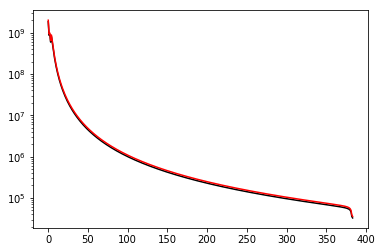

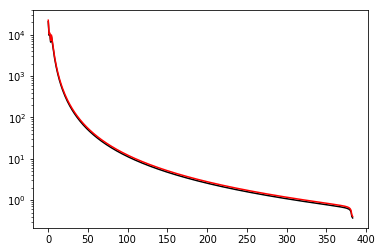

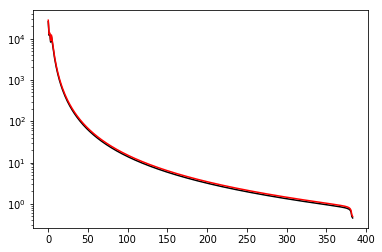

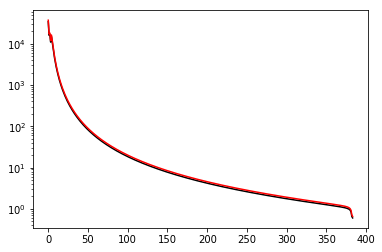

In [47]:
for i in range(len(freqs)):
    figure()
    semilogy(mom1x1_old[i], 'k');
    semilogy(mom1x1_new[i], 'r');

In [48]:
%autoreload

In [65]:
beta_cls, beta_map = ff.map_power_beta()

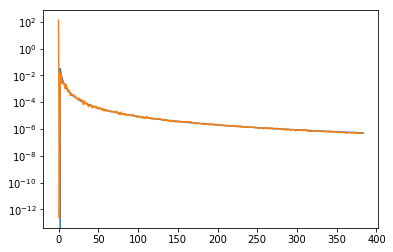

In [50]:
semilogy(bcls)
semilogy(hp.anafast(beta_map))

In [51]:
ells = np.arange(384)

In [61]:
gammas = linspace(-4,-2.01,100)
std = np.zeros_like(gammas)

In [64]:
for i in range(len(gammas)):
    bcls = ff.powerlaw(ells, gammas[i])
    beta_map = hp.synfast(bcls, nside=ff.nside_default, new=True, verbose=False)
    std[i] = np.std(beta_map)

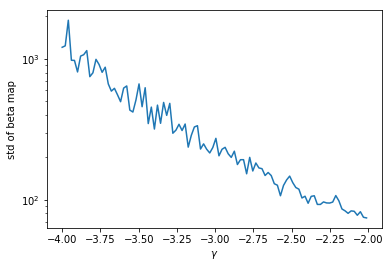

In [69]:
semilogy(gammas, std)
xlabel(r'$\gamma$')
ylabel(r'std of beta map');

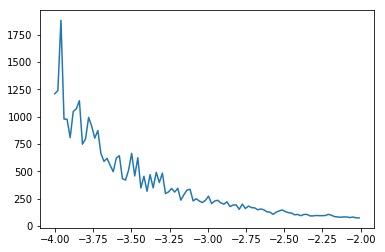

In [65]:
plot(gammas, std)

In [7]:
start=time.time()
mom1x1 = ff.auto1x1(freqs)
end=time.time()
print(end-start)

0.9683010578155518


In [41]:
%autoreload

In [20]:
wigner_sum_old = ff.get_wigner_sum(384, amp_cls, bcls)

In [16]:
wigner_sum_very_old = wignersum_old

In [51]:
wigner_sum_new = ff.get_wigner_sum()

In [52]:
wigner_sum_old - wigner_sum_new

array([6.76074666e+06, 2.90674568e+06, 3.15406899e+06, 1.95210689e+06,
       2.84796963e+06, 1.98880155e+06, 1.36861498e+06, 9.75847099e+05,
       7.22500546e+05, 5.52761656e+05, 4.34686547e+05, 3.49768201e+05,
       2.86914599e+05, 2.39229344e+05, 2.02273833e+05, 1.73100702e+05,
       1.49697562e+05, 1.30655990e+05, 1.14968339e+05, 1.01899401e+05,
       9.09032308e+04, 8.15679577e+04, 7.35783902e+04, 6.66901740e+04,
       6.07116232e+04, 5.54907373e+04, 5.09057868e+04, 4.68583932e+04,
       4.32683789e+04, 4.00698900e+04, 3.72084454e+04, 3.46386692e+04,
       3.23225316e+04, 3.02279723e+04, 2.83278152e+04, 2.65989052e+04,
       2.50214176e+04, 2.35783018e+04, 2.22548293e+04, 2.10382264e+04,
       1.99173715e+04, 1.88825463e+04, 1.79252292e+04, 1.70379234e+04,
       1.62140128e+04, 1.54476413e+04, 1.47336109e+04, 1.40672946e+04,
       1.34445637e+04, 1.28617244e+04, 1.23154645e+04, 1.18028070e+04,
       1.13210705e+04, 1.08678345e+04, 1.04409099e+04, 1.00383129e+04,
      

In [23]:
big_w3j = np.load('w3j.npy')

In [24]:
big_w3j.shape

(384, 384, 384)

In [45]:
pcls, amp_map = ff.map_amp()

In [63]:
%autoreload
wigner_sum_new = ff.get_wigner_sum()

In [64]:
wigner_sum_very_old - wigner_sum_new

array([6.58285271e+06, 2.82331933e+06, 3.06677270e+06, 1.89498759e+06,
       2.76981646e+06, 1.93130595e+06, 1.32735724e+06, 9.45483146e+05,
       6.99470750e+05, 5.34810752e+05, 4.20362283e+05, 3.38107746e+05,
       2.77260087e+05, 2.31118544e+05, 1.95373731e+05, 1.67165979e+05,
       1.44543900e+05, 1.26142456e+05, 1.10985477e+05, 9.83610042e+04,
       8.77405418e+04, 7.87255131e+04, 7.10109848e+04, 6.43606166e+04,
       5.85890521e+04, 5.35493406e+04, 4.91238192e+04, 4.52174121e+04,
       4.17526458e+04, 3.86658964e+04, 3.59045346e+04, 3.34247320e+04,
       3.11897598e+04, 2.91686577e+04, 2.73351843e+04, 2.56669827e+04,
       2.41449132e+04, 2.27525155e+04, 2.14755720e+04, 2.03017527e+04,
       1.92203230e+04, 1.82219031e+04, 1.72982688e+04, 1.64421851e+04,
       1.56472673e+04, 1.49078643e+04, 1.42189600e+04, 1.35760899e+04,
       1.29752701e+04, 1.24129364e+04, 1.18858931e+04, 1.13912678e+04,
       1.09264735e+04, 1.04891748e+04, 1.00772597e+04, 9.68881437e+03,
      

In [54]:
big_w3j[1,:,:].shape

(384, 384)

In [68]:
beta_cls, beta_map = ff.map_power_beta()
np.save('beta_cls', beta_cls)

In [69]:
true_bcls = np.load('beta_cls.npy')

In [70]:
##try again using the same beta_cls
%autoreload
very_old = ff1.get_wigner_sum(384, amp_cls, true_bcls)
new = ff.get_wigner_sum()

In [72]:
very_old-new

array([5.49252814e+06, 2.33424703e+06, 2.54552510e+06, 1.56334508e+06,
       2.30111727e+06, 1.59546812e+06, 1.09130196e+06, 7.74404714e+05,
       5.71202745e+05, 4.35707824e+05, 3.41821084e+05, 2.74516766e+05,
       2.24834961e+05, 1.87228541e+05, 1.58140267e+05, 1.35215446e+05,
       1.16850767e+05, 1.01926823e+05, 8.96444563e+04, 7.94216892e+04,
       7.08270945e+04, 6.35356940e+04, 5.72991317e+04, 5.19251061e+04,
       4.72629332e+04, 4.31932461e+04, 3.96205377e+04, 3.64676863e+04,
       3.36718860e+04, 3.11815868e+04, 2.89541685e+04, 2.69541541e+04,
       2.51518261e+04, 2.35221437e+04, 2.20438904e+04, 2.06989964e+04,
       1.94719965e+04, 1.83495943e+04, 1.73203078e+04, 1.63741819e+04,
       1.55025512e+04, 1.46978456e+04, 1.39534288e+04, 1.32634636e+04,
       1.26227998e+04, 1.20268794e+04, 1.14716571e+04, 1.09535331e+04,
       1.04692950e+04, 1.00160697e+04, 9.59128091e+03, 9.19261344e+03,
       8.81798206e+03, 8.46550475e+03, 8.13347944e+03, 7.82036383e+03,
      

In [88]:
%autoreload
mom0x0 = ff.auto0x0(freqs)
mom1x1 = ff.auto1x1(freqs)
mom0x2 = ff.auto0x2(freqs)

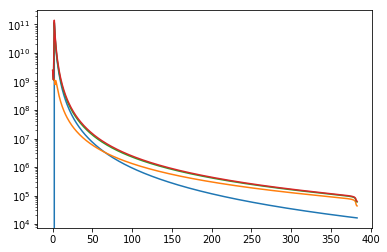

In [82]:
semilogy(mom0x0[0])
semilogy(mom1x1[0])
semilogy(mom0x0[0]+mom1x1[0])
semilogy(mom0x0[0]+mom1x1[0]+mom0x2[0])
# semilogy(mom0x2[0])

In [89]:
default_map = ff.map_full_power(freqs)

In [90]:
anafast = hp.anafast(default_map[0])

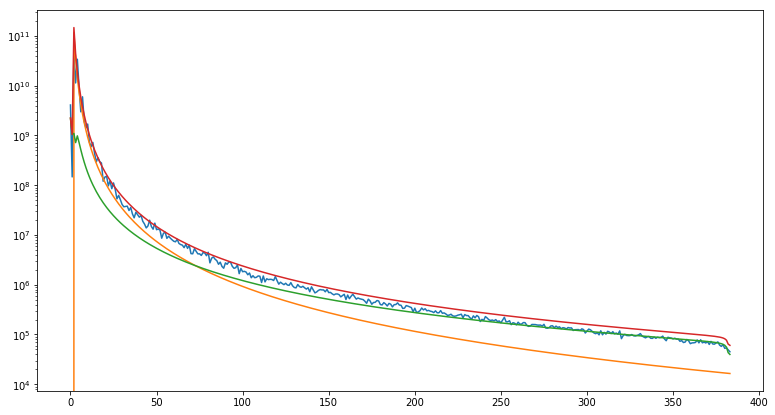

In [91]:
figure(figsize=(13,7))
semilogy(anafast)
semilogy(mom0x0[0])
semilogy(mom1x1[0])
# semilogy(mom0x0[0]+mom1x1[0])
semilogy(mom0x0[0]+mom1x1[0]+mom0x2[0])

# semilogy(mom0x2[0])